In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,1]

In [6]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [7]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

Text(0.5, 1.0, 'Experience VS Salary')

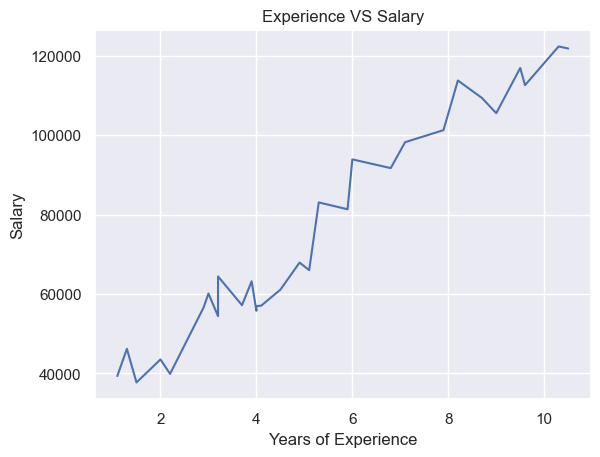

In [11]:
plt.plot(X,y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title("Experience VS Salary")

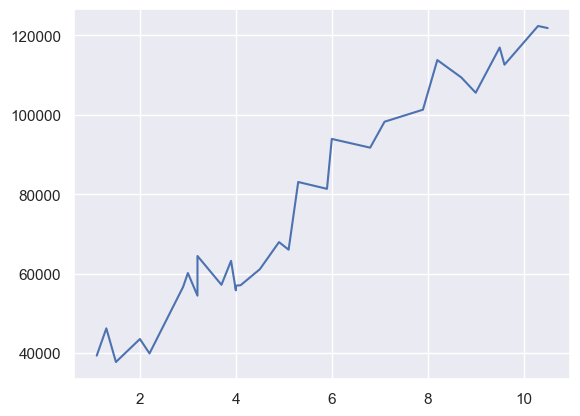

In [9]:
plt.plot(df.YearsExperience,df.Salary)

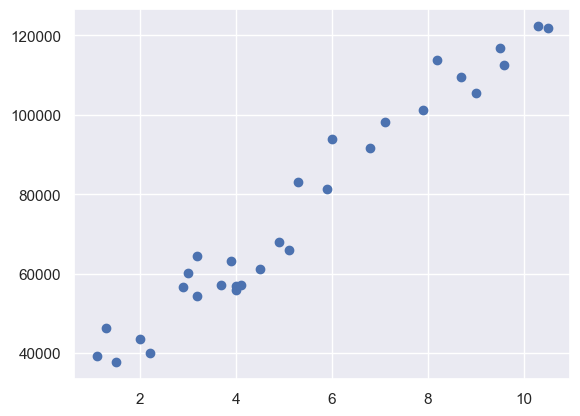

In [12]:
plt.scatter(df.YearsExperience,df.Salary)

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

In [14]:
print(len(X_test))
print(len(X_train))
print(len(y_train))
print(len(y_test))

8
22
22
8


In [15]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
len(y_pred)

8

In [19]:
y_pred

array([ 55515.75118744, 125989.85270786,  52619.55523455, 116335.86619822,
        55515.75118744, 117301.26484918,  63238.94039516,  93166.29857507])

In [20]:
y_pred,X_train

(array([ 55515.75118744, 125989.85270786,  52619.55523455, 116335.86619822,
         55515.75118744, 117301.26484918,  63238.94039516,  93166.29857507]),
     YearsExperience
 11              4.0
 23              8.2
 18              5.9
 4               2.2
 3               2.0
 24              8.7
 16              5.1
 14              4.5
 20              6.8
 9               3.7
 15              4.9
 25              9.0
 0               1.1
 1               1.3
 22              7.9
 10              3.9
 19              6.0
 17              5.3
 6               3.0
 28             10.3
 2               1.5
 13              4.1)

<AxesSubplot:xlabel='Salary'>

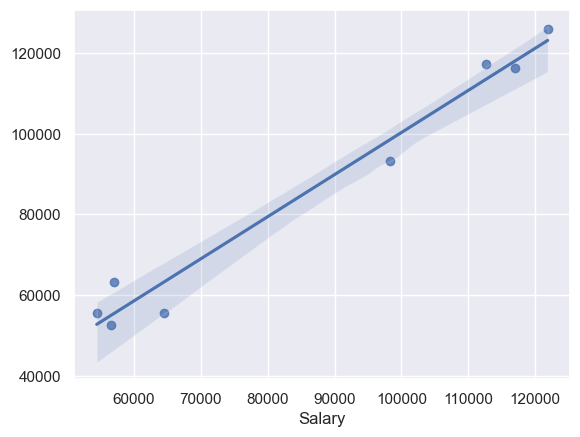

In [24]:
sns.regplot(x=y_test,y=y_pred)

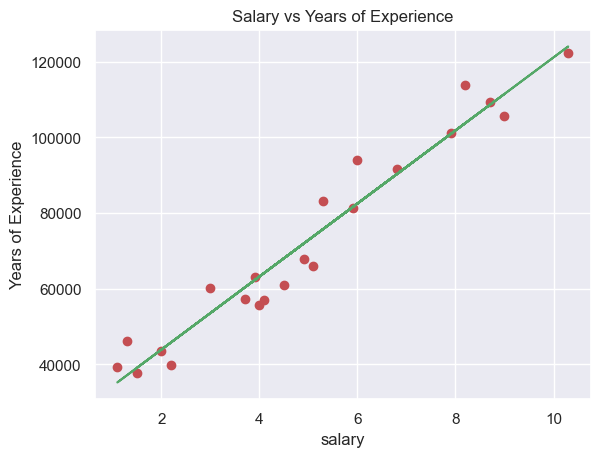

In [25]:
plt.scatter(X_train,y_train,color='r')
plt.plot(X_train,model.predict(X_train),color='g')
plt.xlabel('salary')
plt.ylabel('Years of Experience')
plt.title('Salary vs Years of Experience')
plt.show()

In [26]:
model.coef_

array([9653.98650965])

In [27]:
model.intercept_

24622.99435657626

In [28]:
import statsmodels.api as sm

In [29]:
X = sm.add_constant(X)

In [30]:
model= sm.OLS(y, X).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           1.14e-20
Time:                        14:18:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.predict(X_train)